In [ ]:
# I used the Kaggle Notebook for this project

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Information to help me understand this project better:<br>
**os** is a Python’s library that allows you to interact with operating systems, whether they are Windows, Mac OS, or Linux, for instance, renaming or deleting files, listing all objects inside a certain folder from a given path, etc. from Notebook to the PC<br>
**cv2** is an OpenCV library that is designed specifically to solve various computer vision problems, such as reading and load images into the Notebook<br>
**listdir()** returns a list containing the names of the entries in the directory given by path. The list is in arbitrary order.<br>
**img_to_array** helps to convert the abstract form to an array form<br>
**tf.keras.utils.image_dataset_from_directory** Generates a tf.data.Dataset from image files in a directory.<br>
**tensorflow_datasets as tfds** -  It should ne quite easy to load the data using TFDS API (I had an error though)<br>

A big aspect of machine learning is data processing. Feature engineering and normalizing data is important. Correctly formatted data will help the model train better and make better inferences about the data.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten

In [4]:
malaria_data=os.listdir('../input/cell-images-for-detecting-malaria/cell_images/cell_images/')
print(malaria_data)

parasitized=os.listdir('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized')
print(parasitized[:2])

uninfected=os.listdir('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected')
print(uninfected[:2])

['Uninfected', 'Parasitized']
['C99P60ThinF_IMG_20150918_141001_cell_93.png', 'C99P60ThinF_IMG_20150918_141001_cell_133.png']
['C203ThinF_IMG_20151029_102123_cell_51.png', 'C238NThinF_IMG_20151207_114038_cell_84.png']


I realized later in the code that the dataset has another cell_images folder with the same parasitized and uninfected folders, so I tried to work with double amount of images..

### Display Images Using OpenCV and Matplotlib

In [5]:
import cv2

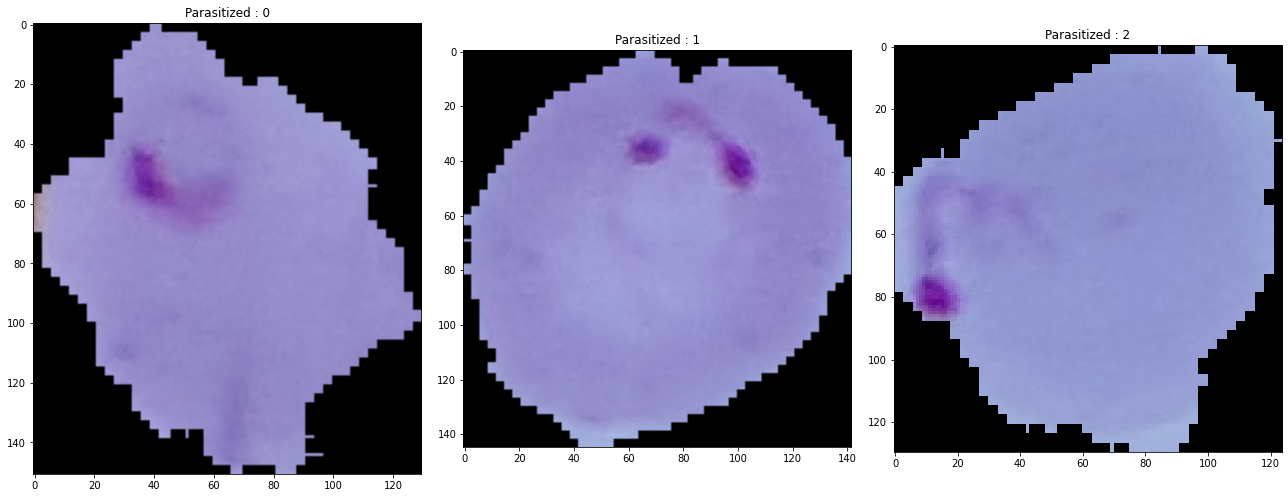

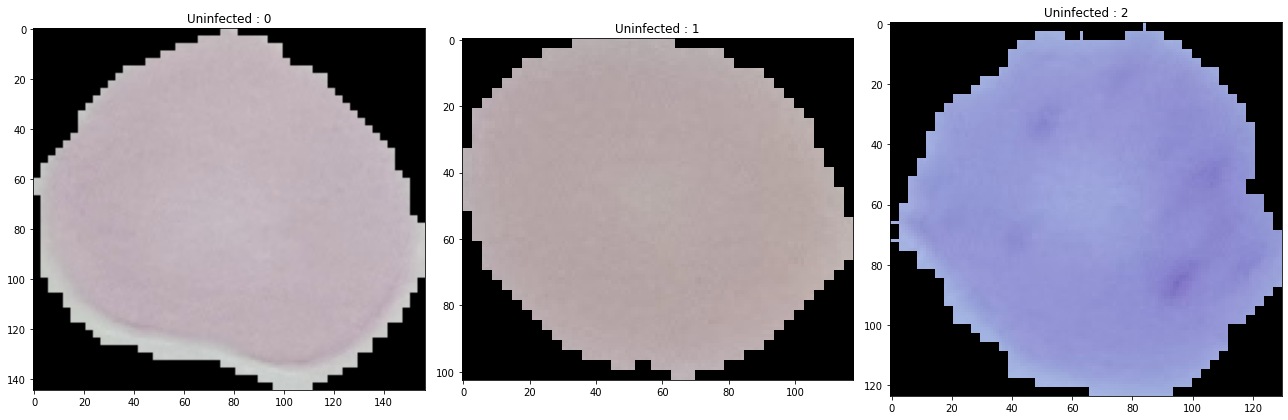

In [6]:
# show fisrt 3 parasitized images
plt.figure(figsize = (18,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized' + "/" + parasitized[i])
    plt.imshow(img)
    plt.title('Parasitized : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

# show fisrt 3 parasitized images
plt.figure(figsize = (18,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected' + "/" + uninfected[i])
    plt.imshow(img)
    plt.title('Uninfected : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import img_to_array

### Assign Images and Labels into Variables

We assign all images into one single variable with a label 1 for parasitized and 0 for uninfected.<br>
We first loop through all images in each folder, read the image, resize the image we read to 100x100, then insert them into an array format so we can later use them for our model

In [8]:
data = [] # This is where we store the images
labels = [] # This is where we store the labels 
for img in parasitized: #go through all parasitized images
    try:
        img_read = plt.imread('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (100, 100)) #resizing the image to 100w x 100h
        img_array = img_to_array(img_resize) # convert image from abstract format to an array format
        data.append(img_array) # append the image to the data list
        labels.append(1) # add a 1 to the labels for "parasitized"
    except:
        None
        
for img in uninfected: #go through all uninfected images
    try:
        img_read = plt.imread('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected' + "/"+ img)
        img_resize = cv2.resize(img_read, (100, 100)) #resizing the image to 100w x 100h
        img_array = img_to_array(img_resize) # convert image from abstract format to an array format
        data.append(img_array) # append the image to the data list
        labels.append(0) # add a 0 to the labels for "uninfected"
    except:
        None

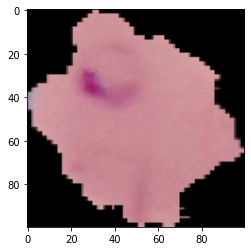

In [9]:
#show an example of our data and label
plt.imshow(data[0])
plt.show()

In [10]:
print(labels[0]) # output is 1 for parasitized

1


Use another way to generate Dataset

### Generate a tf.data.Dataset from Image files in our directory 

In [45]:
import pathlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from tensorflow.keras import layers

In [12]:
cell_images = pathlib.Path('../input/cell-images-for-detecting-malaria/cell_images/cell_images/')

In [13]:
# Train Dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    cell_images, #directory for our dataset
    batch_size=64,
    image_size=(100, 100),# height x width
    seed=123, # Optional random seed for shuffling and transformations. 
    validation_split=0.2, # Optional float between 0 and 1, fraction of data to reserve for validation. 
    subset='training', # Subset of the data to return. One of "training", "validation" or "both". Only used if validation_split is set
)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


2022-11-15 22:30:42.397600: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 22:30:42.493090: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 22:30:42.494004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 22:30:42.498027: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [14]:
# Validation Dataset
val_data = tf.keras.utils.image_dataset_from_directory(
    cell_images, #directory for our dataset
    batch_size=64,
    image_size=(100, 100),# height x width
    seed=123, # Optional random seed for shuffling and transformations. 
    validation_split=0.2, # Optional float between 0 and 1, fraction of data to reserve for validation. 
    subset='validation', # Subset of the data to return. One of "training", "validation" or "both". Only used if validation_split is set
)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [15]:
classes = train_data.class_names
print(classes)

['Parasitized', 'Uninfected']


In [16]:
classes = val_data.class_names
print(classes)

['Parasitized', 'Uninfected']


In [17]:
#import tensorflow_datasets as tfds

In [ ]:
#ds, info = tfds.load('malaria', split='train', shuffle_files=True, with_info=True)

**AUTOTUNE** will prompt the tf. data runtime to tune the value dynamically at runtime, because we have a big amount of data

In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)    

## Build Model

In [102]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(100, 100, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.4),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

In [103]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics="accuracy") #  binary classification problem

In [104]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 64)       

In [105]:
tf.keras.backend.clear_session() # clear cache

In [106]:
model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
345/345 [==============================] - 5s 12ms/step - loss: 0.5250 - accuracy: 0.7264 - val_loss: 0.2961 - val_accuracy: 0.9232
Epoch 2/15
345/345 [==============================] - 4s 11ms/step - loss: 0.2128 - accuracy: 0.9258 - val_loss: 0.1767 - val_accuracy: 0.9361
Epoch 3/15
345/345 [==============================] - 4s 12ms/step - loss: 0.1698 - accuracy: 0.9414 - val_loss: 0.1657 - val_accuracy: 0.9376
Epoch 4/15
345/345 [==============================] - 4s 11ms/step - loss: 0.1544 - accuracy: 0.9481 - val_loss: 0.1479 - val_accuracy: 0.9525
Epoch 5/15
345/345 [==============================] - 4s 12ms/step - loss: 0.1444 - accuracy: 0.9521 - val_loss: 0.1418 - val_accuracy: 0.9539
Epoch 6/15
345/345 [==============================] - 4s 11ms/step - loss: 0.1318 - accuracy: 0.9551 - val_loss: 0.1468 - val_accuracy: 0.9526
Epoch 7/15
345/345 [==============================] - 4s 11ms/step - loss: 0.1218 - accuracy: 0.9580 - val_loss: 0.1339 - val_accuracy: 0.9568

In [107]:
_,accuracy=model.evaluate(val_data)

87/87 [==============================] - 0s 5ms/step - loss: 0.1801 - accuracy: 0.9523


We can see that our model has an accuracy of 95%